<a href="https://colab.research.google.com/github/DipeshChothwe/Image-classification-Jeans-and-Trousers/blob/master/Assignment4_image_classification_optimisers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras import datasets, layers, models

import cv2
import numpy as np
import imutils

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
test_path = "/content/drive/My Drive/FliproboAssgn/Test"
train_path = "/content/drive/My Drive/FliproboAssgn/Train"


In [5]:
from keras.preprocessing.image import ImageDataGenerator

Folder_name=train_path
Extension=".jpg"



datagen = ImageDataGenerator()
# load and iterate training dataset
train_image = datagen.flow_from_directory(train_path , class_mode='binary', batch_size=1200)
# load and iterate validation dataset
test_image = datagen.flow_from_directory(test_path , class_mode='binary', batch_size=60)
train_images, train_labels = train_image.next()
test_images, test_labels = test_image.next()

train_images, train_labels = train_image.next()
test_images, test_labels = test_image.next()

Found 200 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


Using TensorFlow backend.


In [6]:
#Shape of images:
print('Shape of train images', train_images.shape)
print('Shape of test images',test_images.shape)
#print(y, y1)

#Normalisation
train_images = train_images / 255.0
test_images = test_images / 255.0

Shape of train images (200, 256, 256, 3)
Shape of test images (60, 256, 256, 3)


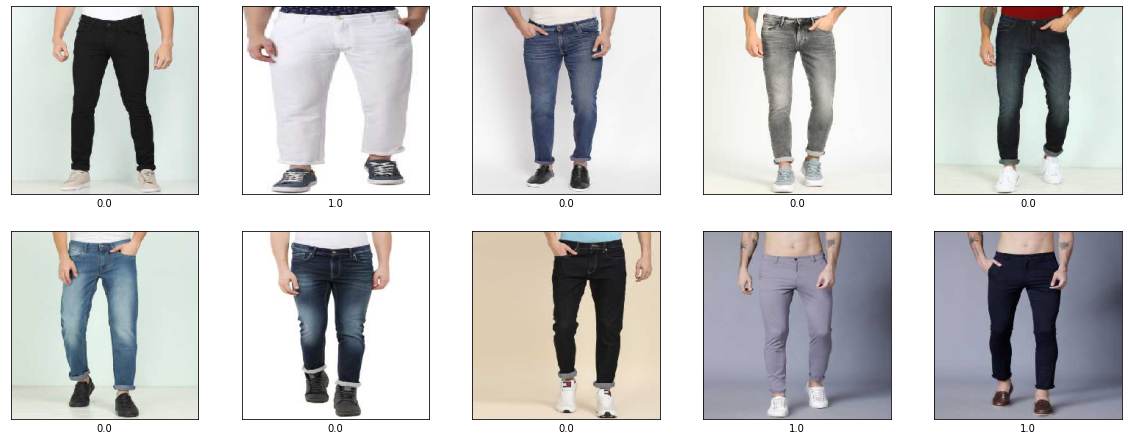

In [7]:
plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i])
plt.show()

In [8]:
#CNN model to classify the handwritten numbers:

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto',
                                                 baseline=None, restore_best_weights=True
                                                 )
                      
                        

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                                 patience=5, min_lr=0.000001
                                                 )
                        
                        


chkpoint = tf.keras.callbacks.ModelCheckpoint("/content/drive/My Drive/FliproboAssgn/model.h5",
                                              monitor="val_loss",
                                              verbose=0,
                                              save_best_only=True,
                                              save_weights_only=False
                                              )

                        
                       

callback = [earlystopping, chkpoint, reduce_lr]

model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(256, 256)),
  keras.layers.Reshape(target_shape=(256, 256, 3)), 

  keras.layers.Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(3,3)),
  keras.layers.Dropout(0.5),

  keras.layers.Flatten(),
  keras.layers.Dense(2)
])


In [9]:
#nadam optimiser
nadam = tf.keras.optimizers.Nadam()

model.compile(optimizer=nadam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
  
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels),
                    callbacks=[callback])
  
nadam_score = history.history

Epoch 1/20
7/7 [==============================] - 9s 1s/step - loss: 13.0117 - accuracy: 0.4700 - val_loss: 12.5455 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
7/7 [==============================] - 12s 2s/step - loss: 7.0238 - accuracy: 0.5300 - val_loss: 12.1738 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/20
7/7 [==============================] - 8s 1s/step - loss: 5.1520 - accuracy: 0.5300 - val_loss: 5.2940 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 2.7341 - accuracy: 0.5350 - val_loss: 0.6017 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 1.7147 - accuracy: 0.5550 - val_loss: 4.4137 - val_accuracy: 0.5167 - lr: 0.0010
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 0.9198 - accuracy: 0.8000 - val_loss: 0.6214 - val_accuracy: 0.7167 - lr: 0.0010


In [11]:
#Adam optimiser
adam = tf.keras.optimizers.Adam()

model1 = keras.Sequential([
  keras.layers.InputLayer(input_shape=(256, 256)),
  keras.layers.Reshape(target_shape=(256, 256, 3)), 

  keras.layers.Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(3,3)),
  keras.layers.Dropout(0.5),

  keras.layers.Flatten(),
  keras.layers.Dense(2)
])

model1.compile(optimizer=adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
  
history = model1.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels),
                    callbacks=[callback])
  
adam_score = history.history





Epoch 1/20
7/7 [==============================] - 8s 1s/step - loss: 5.6056 - accuracy: 0.4900 - val_loss: 2.0562 - val_accuracy: 0.5167 - lr: 0.0010
Epoch 2/20
7/7 [==============================] - 8s 1s/step - loss: 1.2782 - accuracy: 0.5950 - val_loss: 0.9064 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 3/20
7/7 [==============================] - 8s 1s/step - loss: 0.6211 - accuracy: 0.7150 - val_loss: 0.8521 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 0.4020 - accuracy: 0.8100 - val_loss: 0.4866 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 0.1808 - accuracy: 0.9450 - val_loss: 0.5136 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 0.1072 - accuracy: 0.9900 - val_loss: 0.5134 - val_accuracy: 0.7333 - lr: 0.0010


In [13]:
#sgd_nesterov optimiser

sgd_nesterov = tf.keras.optimizers.SGD(momentum=0.01, nesterov=True)

model2 = keras.Sequential([
  keras.layers.InputLayer(input_shape=(256, 256)),
  keras.layers.Reshape(target_shape=(256, 256, 3)), 

  keras.layers.Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(3,3)),
  keras.layers.Dropout(0.5),

  keras.layers.Flatten(),
  keras.layers.Dense(2)
])

model2.compile(optimizer=sgd_nesterov,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
  
history = model2.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels),
                    callbacks=[callback])
  
sgd_nesterov_score = history.history

Epoch 1/20
7/7 [==============================] - 8s 1s/step - loss: 3.7007 - accuracy: 0.5550 - val_loss: 0.6859 - val_accuracy: 0.6667 - lr: 0.0100
Epoch 2/20
7/7 [==============================] - 8s 1s/step - loss: 0.6774 - accuracy: 0.7200 - val_loss: 0.6755 - val_accuracy: 0.6833 - lr: 0.0100
Epoch 3/20
7/7 [==============================] - 8s 1s/step - loss: 0.6638 - accuracy: 0.7850 - val_loss: 0.6662 - val_accuracy: 0.6833 - lr: 0.0100
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 0.6462 - accuracy: 0.7100 - val_loss: 0.6533 - val_accuracy: 0.7167 - lr: 0.0100
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 0.6266 - accuracy: 0.8100 - val_loss: 0.6511 - val_accuracy: 0.5667 - lr: 0.0100
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 0.6096 - accuracy: 0.7550 - val_loss: 0.6256 - val_accuracy: 0.7667 - lr: 0.0100
Epoch 7/20
7/7 [==============================] - 8s 1s/step - loss: 0.5919 - accuracy: 0.7700 - val

In [15]:
#rms_prop optimiser

rms_prop = tf.keras.optimizers.RMSprop()

model3 = keras.Sequential([
  keras.layers.InputLayer(input_shape=(256, 256)),
  keras.layers.Reshape(target_shape=(256, 256, 3)), 

  keras.layers.Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(3,3)),
  keras.layers.Dropout(0.5),

  keras.layers.Flatten(),
  keras.layers.Dense(2)
])

model3.compile(optimizer=rms_prop,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
  
history = model3.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels),
                    callbacks=[callback])
  
rms_prop_score = history.history

Epoch 1/20
7/7 [==============================] - 8s 1s/step - loss: 30.8814 - accuracy: 0.5250 - val_loss: 21.3259 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
7/7 [==============================] - 8s 1s/step - loss: 11.9120 - accuracy: 0.4800 - val_loss: 2.8085 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 3/20
7/7 [==============================] - 8s 1s/step - loss: 4.8716 - accuracy: 0.5300 - val_loss: 0.7827 - val_accuracy: 0.6833 - lr: 0.0010
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 2.9581 - accuracy: 0.5600 - val_loss: 4.6127 - val_accuracy: 0.5167 - lr: 0.0010
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 1.6144 - accuracy: 0.7050 - val_loss: 0.6781 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 6/20
7/7 [==============================] - 8s 1s/step - loss: 1.1991 - accuracy: 0.7300 - val_loss: 1.0974 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.5507 - accuracy: 0.7750 - 

In [ ]:
model.summary()

In [16]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print("test accuracy:", test_acc)
print("train accuracy:", train_acc)

7/7 - 2s - loss: 0.3803 - accuracy: 0.8400
2/2 - 0s - loss: 0.6017 - accuracy: 0.7167
test accuracy: 0.7166666388511658
train accuracy: 0.8399999737739563


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)